# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=267937  #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['in', 'the', 'grand', 'scheme', 'of', 'mel', 'gibson', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
#reusable function to get n label from training data
def get_dataset(training, label, number):
  random.seed(41)
  dataset = []
  i = 0
  while len(dataset) < number:
    i = random.randrange(len(training_data))
    if training[i][1] == label:
      dataset.append(training[i])

  return dataset

ten_pos_training = get_dataset(training_data, 'pos', 10)
ten_pos_training

[(['meet', 'joe', 'black', 'is', 'your', 'classic', ...], 'pos'),
 (['if', 'there', "'", 's', 'one', 'thing', 'in', ...], 'pos'),
 (['star', 'wars', ':', 'episode', 'i', '-', 'the', ...], 'pos'),
 (['the', 'premise', 'is', 'simple', ',', 'if', 'not', ...], 'pos'),
 (['let', 'me', 'first', 'say', 'that', 'the', ...], 'pos'),
 (['before', 'you', 'read', 'my', 'review', ',', 'you', ...], 'pos'),
 (['it', 'must', 'be', 'tough', 'to', 'be', 'a', 'mob', ...], 'pos'),
 (['synopsis', ':', 'captain', 'picard', 'and', 'the', ...], 'pos'),
 (['in', 'chocolat', ',', 'a', 'chocolate', 'shop', ...], 'pos'),
 (['for', 'those', 'of', 'us', 'who', 'weren', "'", 't', ...], 'pos')]

In [6]:
ten_neg_training = get_dataset(training_data, 'neg', 10)
ten_neg_training

[(['a', 'backdrop', 'of', 'new', 'year', "'", 's', 'eve', ...], 'neg'),
 (['here', 'i', 'sit', 'at', 'my', 'computer', 'about', ...], 'neg'),
 (['one', 'of', 'the', 'first', 'films', 'of', '1999', ...], 'neg'),
 (['another', 'formula', "'", 'feel', 'good', "'", ...], 'neg'),
 (['one', 'of', 'my', 'favorite', 'songs', 'by', 'the', ...], 'neg'),
 (['synopsis', ':', 'wealthy', 'cuban', 'landowner', ...], 'neg'),
 (['the', 'yet', '-', 'to', '-', 'be', '-', 'released', ...], 'neg'),
 (['toward', 'the', 'bottom', 'of', 'the', "'", '80s', ...], 'neg'),
 (['"', 'tina', '!', '!', '!', 'fetch', 'me', 'the', ...], 'neg'),
 (['i', "'", 'll', 'bet', 'right', 'now', 'you', "'", ...], 'neg')]

First I build a function that will take **training data**, the **label** of data(positive or negative review) and the **total number** that wil extracted from the training data as a **paremeter** to my funtion.
Inside the function it will pick a random review in the training data and it will check wheter it is a positive or negative. If it is the data that the function want, then it will append to a list until the length of the list is the same as number parameter.

because I build this function, all I need to do is calling the function and input the paramater of we want.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [7]:
#tokenization
def norm(dataset):
  STOP = stopwords.words('english')
  normalize = []
  for word in dataset:
    if word.isalpha() and not word.isnumeric() and word not in STOP:
      normalize.append(word)
  return normalize

#get the most frequent word in the classifier
def differences(dataset1, dataset2):
  common = (dataset1-dataset2).most_common()
  return [word for (word,freq) in common if freq > 0]

posFreq = [(FreqDist(norm(word)), label) for (word,label) in ten_pos_training]
negFreq = [(FreqDist(norm(word)), label) for (word,label) in ten_neg_training]
trainData = posFreq + negFreq

class WordListClassifier(ClassifierI):

   def __init__(self):
        pass

   #setting the wordlist for hand written worldlist
   def setWordList(self, pos , neg):
      self.pos = pos
      self.neg = neg

   def classifier(self, data):
      score = 0

      #score increment if it considered as positve and decrement if it considered as negative
      for word,number in data.items():
        if word in self.pos:
          score += number
        elif word in self.neg:
          score -= number
      return 'neg' if score < 0 else 'pos'

   def classify_many(self, docs):
    dataset = []
    for doc in docs:
      dataset.append(self.classifier(doc))
    return dataset



   def train(self, dataset):
      posFreqDist = FreqDist()
      negFreqDist = FreqDist()
      for docs, label in dataset:
        #divide the dataset based on label
        if label == 'pos':
          posFreqDist += docs
        else:
          negFreqDist += docs
      #set the most frequent word
      self.pos = differences(posFreqDist, negFreqDist)
      self.neg = differences(negFreqDist, posFreqDist)



my_wordList = WordListClassifier()
my_wordList.train(trainData)

Before I start making my own Word Classifier, I need to **remove stop word**, **remove all number** and **remove Uppercase** of the **Training Data from Q1**. In order to do that, I build a function called *norm*. After all the data has been filtered, I put it on one list called *trainData*

Next I build a class called *WordListClassifier* because I believe it would be more robust, efficient and reusable rather than building my word classifier in one function. The class have four method:

1. *setWordList(pos,neg)*
This is a setter method that will set the word list without training it. This is use for hand written word list

2. *train(dataset)*
this setter method will train the training data (in this case, trainData from q1) by seperating the negative and positive review and determining wheter the bag of word is a positve or negative

3. *classifier(data)*
this method will classify wheter the input data is a positve or negative review by incrementing the total score by one if there's a word in the positive 'bag of word' and decreasing by one if there's a word in the negative 'bag of word'. the review input will be considered positve if the total score is more than 0 and negative otherwise

4. *classify_many(docs)*
Originally, I only have 3 methods in this class, but I added this method for the next question. This method will allow classifying more than one testing data

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [8]:
class Calculation:
  def __init__(self, word, label):
    self.word = word
    self.label = label
    self.tp= 0
    self.fp= 0
    self.fn= 0
    self.tn = 0
    self.score = 0
    for prediction,goldstandart in zip(word, label):

    # to calculate the accuracy we increment score
      if prediction == goldstandart:
        self.score += 1

      # to calculate the f1, recall and precision we increment tp, fp, tn, fn
      if goldstandart == 'pos':
        if prediction == 'pos':
          self.tp += 1
        else:
          self.fn += 1
      elif prediction == 'pos':
        self.fp += 1
      else:
        self.tn += 1

  #making it def so it's easier to call
  def precision(self):
    return self.tp / ( self.tp + self.fp )

  def recall(self):
    return self.tp / ( self.tp + self.fn)

  def f1(self):
    return 2 * self.precision() * self.recall() /(self.precision() +self.recall())

  def accuration(self):
    return self.score / len(self.label)

  def printing(self):
    #to printin all
    print('The precision is '+str(self.precision()))
    print('The recall is '+str(self.recall()))
    print('The f1 is '+str(self.f1()))
    print('The accuracy is '+str(self.accuration()))


#trained word list with only 20 dataset (10 neg and pos review from q1)
testingData = [(FreqDist(norm(wordlist)),label) for (wordlist,label) in training_data]
docs,labels=zip(*testingData)
calculate = Calculation(my_wordList.classify_many(docs), labels)
calculate.printing()

print()

#10 hand Written Word List for positive and negative bag of word (we don't need to train these data)
pos_words = ["good","great","lovely", "excellent", "enjoy"]
neg_words = ["bad", "terrible", "awful", "dreadful", "unpleasent"]
handWritten_wordList = WordListClassifier()
handWritten_wordList.setWordList(pos_words, neg_words)
calculate2 = Calculation(handWritten_wordList.classify_many(docs), labels)
calculate2.printing()

The precision is 0.5145784081954294
The recall is 0.9328571428571428
The f1 is 0.6632808532249873
The accuracy is 0.5264285714285715

The precision is 0.5634167385677308
The recall is 0.9328571428571428
The f1 is 0.7025282409897795
The accuracy is 0.605


For this question, I build another class called *Calculation* that will calculate all **F1**, **recall** and **accuracy** of the word list and can be printed by just calling the method. With only** 20 reviews** in total from Q1, my word list classifier get an **accuracy just over 50%**, this happened because the **trained data is not that many**, making some bag of words are **bias** and making my word classifier **not that robust and accurate to determining the testing data.**

Therefore, an **evaluation** of my word classifier **is needed** in terms of accuracy. For comparasion, I **build another classifier** that will not train the data because it is a "**hand written" word list**. I calculate the word list classifier and **suprisingly**, **it generate more precision, f1, and accuracy.**

based on the data shown above, we can conclude that if we have only a** few train data**, it is** better** that we **pick our own bag of words** from the data rather than train the data.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [9]:
from nltk.classify import NaiveBayesClassifier

#get naive bayes classifier from nltk and train the data
naiveBayes = NaiveBayesClassifier.train(trainData)
doc,label=zip(*testingData)

#using the class form Q3
calculate3 = Calculation(naiveBayes.classify_many(docs), label)
calculate3.printing()

#Using pandas to show the differences
dataFrame = {"Data": ["Precision", "F1", "Recall", "Accuracy"],
             "Naive Bayes Classifier": [calculate3.precision(), calculate3.f1(), calculate3.recall(), calculate3.accuration()],
             "Word List Classifier": [calculate.precision(), calculate.f1(), calculate.recall(), calculate.accuration()]}
display(pd.DataFrame(dataFrame))

The precision is 0.5824915824915825
The recall is 0.7414285714285714
The f1 is 0.6524198617221874
The accuracy is 0.605


,Data,Naive Bayes Classifier,Word List Classifier
0,Precision,0.582492,0.514578
1,F1,0.652420,0.663281
2,Recall,0.741429,0.932857
3,Accuracy,0.605000,0.526429


From the table graph above, we can say thay Naive Bayes Classifier are better in terms of accuracy eventhough both Naive and Word classifier have only ten data training. This happened because Naive Bayes have different approaches when training and classifying the data. Naive Bayes use probability and likelyhood making Naive have more accuracy with only a handful of data training.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


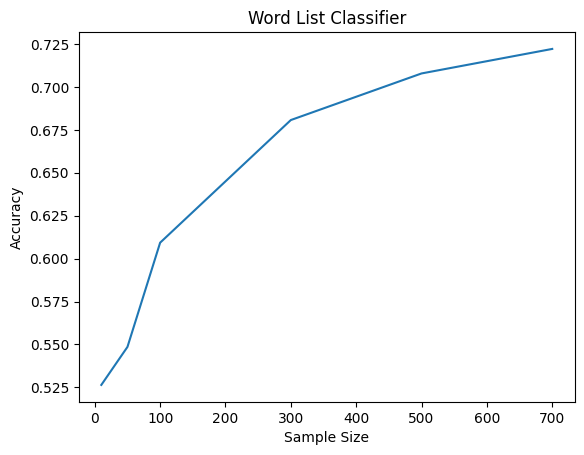

In [10]:
length_wordlist = [10, 50, 100, 300, 500, 700]
precision = []
recall = []
f1 = []
accuracy = []

for number in length_wordlist:
  #get the training data by calling a function from Q1
  pos_training = [(FreqDist(norm(word)), label) for (word,label) in get_dataset(training_data, 'pos', number)]
  neg_training = [(FreqDist(norm(word)), label) for (word,label) in get_dataset(training_data, 'neg', number)]
  dataSet = pos_training + neg_training

  #train the data set
  theClassifier = WordListClassifier()
  theClassifier.train(dataSet)

  #calculate and extract the precision, recall, f1 and accuracy for the graph
  calculation4 = Calculation(theClassifier.classify_many(docs), labels)
  precision.append(calculation4.precision())
  f1.append(calculation4.f1())
  recall.append(calculation4.recall())
  accuracy.append(calculation4.accuration())

#making the line graph using pandas
data = {'Precision' :precision,
        'Recall':recall,
        'F1':f1,
        'Accuracy': accuracy,
        'Number':length_wordlist}
df = pd.DataFrame(data)

#Accuracy Graph
plt.plot(df['Number'], df['Accuracy'], linestyle='-', label='Accuracy')

plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title('Word List Classifier')
plt.show()


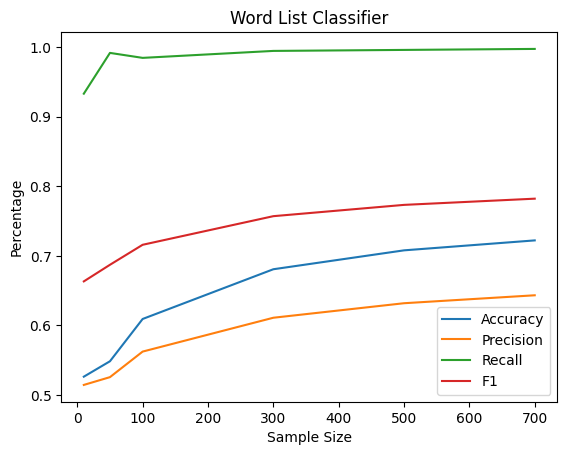

In [11]:
#Accuracy and Others
plt.plot(df['Number'], df['Accuracy'], linestyle='-', label='Accuracy')
plt.plot(df['Number'], df['Precision'], linestyle='-', label='Precision')
plt.plot(df['Number'], df['Recall'], linestyle='-', label='Recall')
plt.plot(df['Number'], df['F1'], linestyle='-', label='F1')

plt.xlabel('Sample Size')
plt.ylabel('Percentage')
plt.title('Word List Classifier')
plt.legend()


For this experiment, I decided to set the length of the wordlist to **six parties** which is **10, 50, 100, 300, 500, 700**. After I trained the training data and classify the testing data from each parties, I can conclude that the **more the length** of the word list, **the better** for the classifier. With 700 trained data, my Wordlist Classifier become more **robust**, **precise** and have **better accuration**. Eventhough it will take **more time** in computation because the classifier have to train all of the 700 data, I would believe that it is the **best approach** for the classifier because it is more **optimal** and **adaptable**.



**NAIVE BAYES CLASSIFIER VS WORDLIST CLASSIFIER**

When we talk about binary classification, there are many approach for determining the best classifier.The different with those two classifier are Naive Bayes using probability and likelyhood for each word in training data and my Word list using most frequent word when training the data. In this case, my Word List Classifier are more simple, easy to intrepret and more transparant, however it requiers a lot of data size in order to have maximum classifier. Unlike Word List, Bayes classifier only need a handful of data size and it can be improved by expanding the size data. With this assignment I could say that both wordlist classifiers and Naive Bayes classifiers can be effective for binary classification tasks. However, in the future work, If there's only a few data size, I would recommend using Naive Bayes Classifier since it generate more accuracy based on Q4. But if you're looking for simplicity and adaptable, I would recommend using my word list because in my wordlist classifier, there's an option to straightforwardly set the "bag of word" as our wordlist without the need of training it (hand written wordlist).

In [12]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/NLEassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

<ipython-input-12-4e7ec440cfa2>:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


Mounted at /content/drive
Submission length is 853
